In [2]:
from pandas import *
from numpy import *
from numpy.linalg import * 
from matplotlib.pylab import *

# Exercice 1 : bac à sable pour les données "jouet"

# Exercice 2 : programmation de l'ACP (suite)

On reprend les données du fichier `demographie.xls` qui contient des statistiques d'une étude de 1987 concernant 166 pays.
Les statistiques des pays correspondent aux 15 variables (1 qualitative, 14 quantitatives) suivantes :
- COUNTRY : nom du pays
- POP87 : population en 1987
- NAT : taux de natalité
- MORT : taux de mortalité
- ACCR : taux d'accroissement de la population
- POP00 : population prévue pour 2000
- POP20 : population prévue pour 2020
- MORTI : taux de mortalité infantile
- FERTI : taux de fertilité
- AGE15 : proportion de la population  de moins de 15 ans
- AGE65 : proportion de la population  de plus de 65 ans
- ESPER : espérance de vie
- URBA : taux d'urbanisation
- PNB : produit national brut
- CONTI : continent (1=Afrique, 2=Asie, 3=Amérique, 4=Europe, 5=Océanie)

On définit les arrays suivants:
- `pays` :  les noms des pays
- `continent` :  les numéros des continents
- `data` : les autres variables (qui sont quantitatives et donc adaptées à une ACP)
- `labels`: les noms des variables contenues dans `data`.

In [3]:
df =read_excel('demographie.xls')
pays = df['COUNTRY'].values
continent = df['CONTI'].values
data = df[['POP87','NAT','MORT','ACCR','POP00','POP20','MORTI','FERTI','AGE15','AGE65','ESPER','URBA','PNB']].values
labels=['87','NAT','MORT','ACCR','00','20','MORTI','FERTI','-15','+65','ESPER','URBA','PNB']
df.head()

,COUNTRY,POP87,NAT,MORT,ACCR,POP00,POP20,MORTI,FERTI,AGE15,AGE65,ESPER,URBA,PNB,CONTI
0,AFGANISTHAN,14.2,48,22,2.6,24.5,39.1,182.0,7.6,46,4,39,16,160.0,2
1,ALBANIA,3.1,26,6,2.0,3.8,4.6,43.0,3.3,35,5,71,34,900.0,4
2,ALGERIA,23.5,42,10,3.2,33.7,49.4,81.0,6.4,46,4,60,43,2530.0,1
3,ANGOLA,8.0,47,22,2.5,11.5,19.1,143.0,6.4,45,3,43,25,500.0,1
4,ANTIGUA ET BARBUDA,0.1,15,5,1.0,0.1,0.1,10.0,1.7,27,6,72,34,2030.0,3


**Question 0.** On a recopié ci-dessous (une version de) la fonction `acp` écrite à la séance précédente. Commentez chaque ligne de commande en expliquant son rôle puis testez la fonction `acp` sur les données de démographie `data`. 

In [4]:
def normalise(M):
    n,p=shape(M)
    Z=zeros((n,p))
    for j in range(p):
        Z[:,j]=(M[:,j]-mean(M[:,j]))/std(M[:,j])
    return Z
def acp(M):
    n,p=shape(M) 
    Z=normalise(M)
    R= 1/n*dot(Z.T,Z)
    val0, P0 = eigh(R) 
    val = sort(val0)[::-1] 
    index = argsort(val0)[::-1] 
    P=zeros((p,p))
    for j in range(p):
        P[:,j]=P0[:,index[j]]
    C=dot(Z,P)
    return val, P, C


**Question 1.** Quelle est la proportion de variance expliquée par les deux premières composantes principales? par les trois premières?

In [5]:
val,P,C = acp(data)
propvarc1c2 = (val[0]+val[1])/len(val)
print("proportion de variance par les 2 premieres composantes principales : ", propvarc1c2)
propvarc1c2c3 = (val[0]+val[1]+val[2])/len(val)
print("proportion de variance par les 3 premieres composantes principales : ", propvarc1c2c3)


proportion de variance par les 2 premieres composantes principales :  0.7912983862986687
proportion de variance par les 2 premieres composantes principales :  0.894959639837353


**Question 2.** À partir de `data`, représentez les points-individus dans le plan principal en nommant les axes (`CP 1`, `CP 2`).  Commentez le graphique.

La plupart des points sont similaires (sauf qqs uns)


'a gauche : pays peu developpés en gros (cf cercle de correlation)'

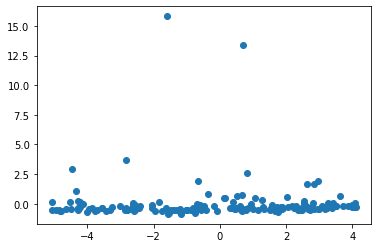

In [6]:
scatter(C[:,0], C[:,1])
print("La plupart des points sont similaires (sauf qqs uns)")
"tres haut : haute population"
"a gauche : pays peu developpés en gros (cf cercle de correlation)"

**Question 3** Créez une fonction `cercle_corr` qui prend en entrée un tableau de données et les noms des variables de départ puis affiche le cercle des corrélations entre les variables centrées réduites de départ et les deux premières composantes principales. Il faudra que les noms des variables apparaissent sur le graphique.
Vous testerez votre fonction avec `data` et `labels`, et commenterez les résultats obtenus.

*Pour que le cercle ne soit pas aplati, il est préférable de fixer la taille de la figure de telle sorte qu'elle s'inscrive dans un carré, par exemple via la commande `figure(figsize=(10,10))`.*

*Pour afficher un "joli" cercle, vous pourrez utiliser la suite de commandes :*
    
`circle1=Circle((0,0),radius=1, color='g', fill=False)`

`fig = gcf()`

`fig.gca().add_artist(circle1)`

`xlim((-1,1)); ylim((-1,1)); grid(True)`
    
*Pour afficher le nom d'une variable au point de coordonnées `x`,`y`, vous pourrez utiliser:*

`annotate('nom_variable', (x,y))`

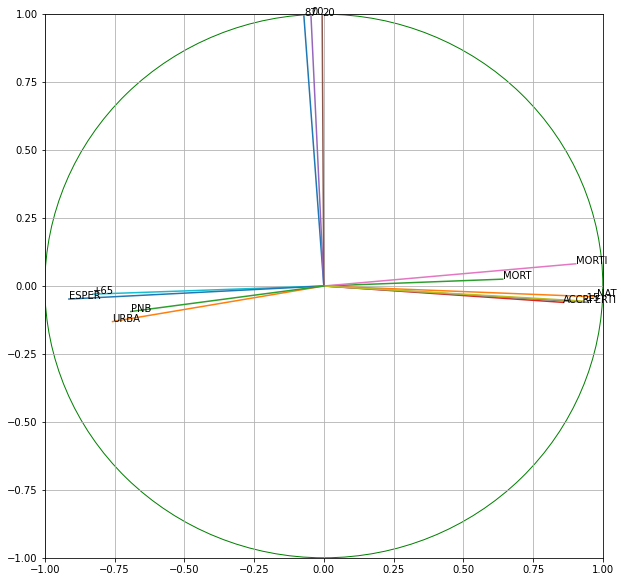

In [7]:
def cercle_corr(data,labels):   
    figure(figsize=(10,10))
    circle1=Circle((0,0),radius=1, color='g', fill=False)
    fig = gcf()
    fig.gca().add_artist(circle1)
    xlim((-1,1)); ylim((-1,1)); grid(True)
    Z = normalise(data)
    val, P,C = acp(data)
    n,p = shape(data)
    coef1 = sqrt(val[0])*P[:,0]
    coef2 = sqrt(val[1])*P[:,1]
    for i in range(p):
        annotate(labels[i], (coef1[i],coef2[i]))
        plot([0,coef1[i]], [0,coef2[i]])


cercle_corr(data,labels)

**Question 4.** On enlève à présent les trois variables `POP87`, `POP00`, `POP20`. Recommencez l'ACP et tracez le nouveau cercle des corrélations. Commentez. Quelle est à présent la proportion de variance expliquée par les deux premières composantes principales ?

'les pays avec un PNB élevés ont un taux d urbanisation élevés mais un taux de mortalité faible (par ex)'

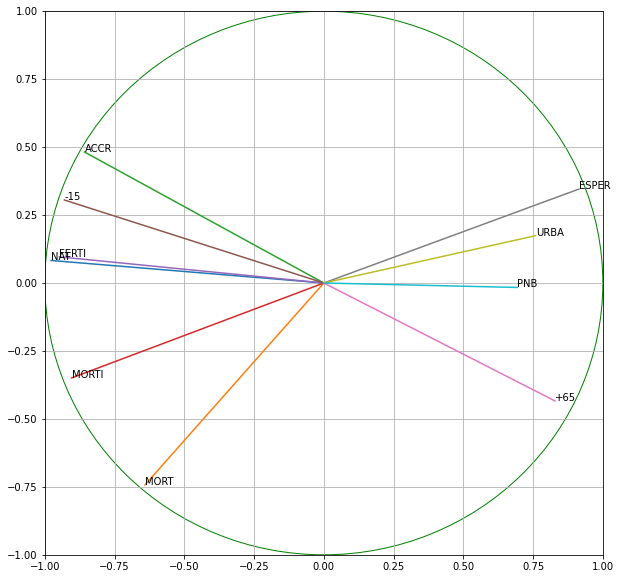

In [8]:
data2 = delete(data,[0,4,5],axis=1)
labels2 = ['NAT','MORT','ACCR','MORTI','FERTI','-15','+65','ESPER','URBA','PNB']
p2=shape(data2)[1]
cercle_corr(data2,labels2)

"les pays avec un PNB élevés ont un taux d urbanisation élevés mais un taux de mortalité faible (par ex)"

# Exercice 3 : Reconnaissance faciale

In [9]:
# importation des images de visages avec la librairie sklearn
from sklearn.datasets import fetch_lfw_people
lfw_dataset = fetch_lfw_people(min_faces_per_person=200) # on ne garde que les individus avec au moins 200 images
X=lfw_dataset.data # vecteur ligne des niveaux de gris de l'image 
y=lfw_dataset.target # labels des images
noms = lfw_dataset.target_names # noms des personnes

Nous venons d'importer 766 photos, en fait 530 photos de George W Bush, président des Etat-Unis entre 2001 et 2009, et 236 photos de Colin Powell, secrétaire d'État des États-Unis au début de la guerre en Irak. Le but de cet exercice est de construire un algorithme de reconnaissance faciale de ces deux personnages.

Chaque photo est encodée par un vecteur ligne de 2914 nombres entre 0 et 255 (8 bits) représentant les niveaux de gris des pixels. Nous avons regroupé les 766 photos dans la matrice $X$ qui est donc de format 766$\times$2914.
Le vecteur $y$ contient les labels des photos : y=1 si c'est une photo de G.W. Bush et y=0 si c'est une photo de C. Powel.

Pour afficher les portraits de ces deux personalités, il faut utiliser la fonction `imshow` en prenant soin de redimensionner le vecteur ligne $X[i,:]$ en indiquant la largueur, la hauteur  et l'encodage en noir et blanc avec l'option
`cmap=plt.cm.gray`. Voici les premières images du jeu de données.

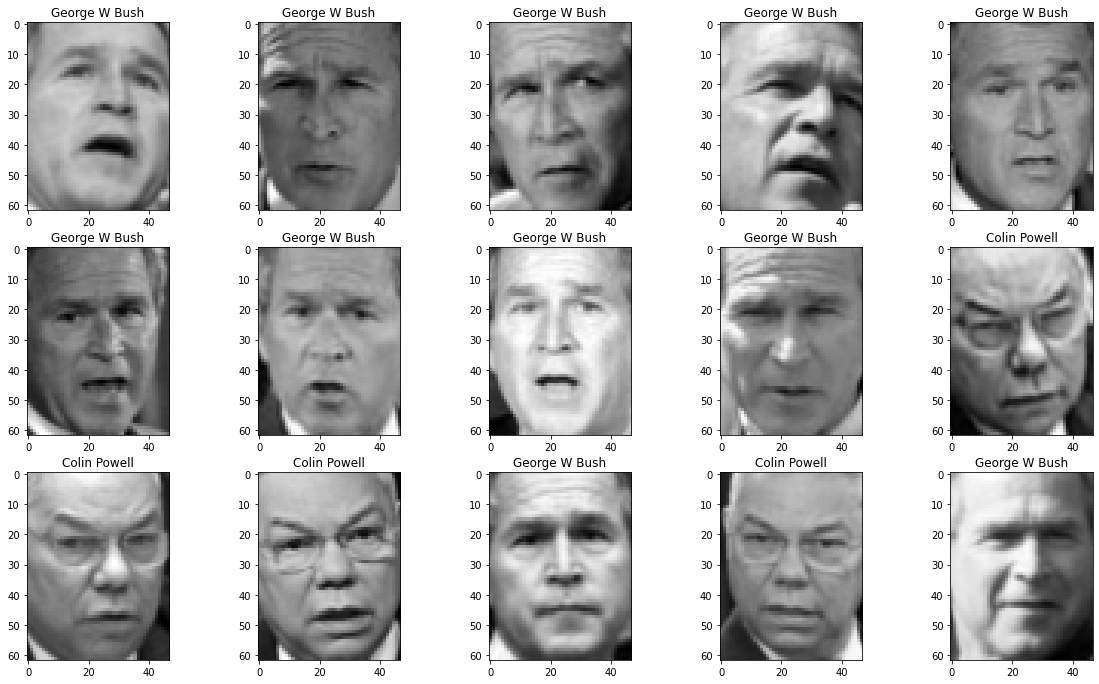

Les labels associés aux images affichées ci-dessus sont :  [1 1 1 1 1 1 1 1 1 0 0 0 1 0 1]


In [10]:
dim=lfw_dataset.images.shape # les dimensions du jeu de données
h=dim[1] # hauteur de chaque image en nombre de pixels
w=dim[2] # largeur de chaque image en nombre de pixels
# on affiche les premières images du jeu de données X, avec les noms correspondants
figure(figsize=(20,20)) # taille de la figure
for i in range(15):
    subplot(5,5,i+1) # sous figures
    imshow(X[i,:].reshape((h, w)), cmap=plt.cm.gray) # affichage de chaque figure
    title(noms[y[i]]) # noms
show()
print('Les labels associés aux images affichées ci-dessus sont : ',y[0:15])

On va à présent séparer le jeu de données aléatoirement en deux. Nous allons entrainer notre algorithme sur les données `X_train`, `y_train` puis le tester sur `X_test`, `y_test`. La variable `test_size` spécifie la proportion de données test que l'on souhaite.

In [11]:
from sklearn.model_selection import train_test_split # permet de découper les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Algorithme du plus proche voisin :**

Voici comment va fonctionner l'algorithme de reconnaissance faciale. Chaque image est un point d'un espace de dimension 2914 (nombre de pixels). On va attribuer le label $i$ (0 pour C. Powel, 1 pour G.W. Bush) à une image du jeu de données test `X_test` si l'image la plus proche (au sens de la distance euclidienne)
du jeu de données `X_train` a pour label $i$. Nous allons ensuite calculer avec `y_test` la proportion d'erreur que notre algorithme a fait. 

On donne la fonction `distance` qui, étant données 2 images (sous forme de vecteurs), renvoie la distance entre ces deux images (au sens de la distance euclidienne).

In [12]:
def distance(I1,I2):
    return sqrt(sum((I1-I2)**2))

**Question 1.** Prédire à partir de `X_train` et `y_train`, les labels des images de `X_test` en utilisant l'agorithme du plus proche voisin décrit plus haut. Stocker ces prédictions dans un vecteur `y_pred`.

Pour pouvoir comparer par la suite des temps d'exécution, effectuez la commande `t1=time()` avant le début de l'algorithme, et `t2=time()` après la fin de l'algorithme. On pourra alors afficher le temps nécessaire à l'exécution de l'algorithme en faisant `print(t2-t1)`.

In [13]:
from time import * # permet de calculer les temps d'exécution
n_test = shape(X_test)[0] # nombre d'individus dans l'échantillon test
n_train = shape(X_train)[0] # nombre d'individus dans l'échantillon train
y_pred = zeros(n_test) # initialisation du vecteur des prédictions
t1=time() # on déclanche le chronomètre
for i in range(n_test): # on parcourt les images de X_test
    mini_index=0  # initialisation de l'indice mini_index
    for j in range(n_train): # on parcourt les images de X_train
        if (distance(X_test[i,:],X_train[j,:])<distance(X_test[i,:],X_train[mini_index,:])):
            mini_index=j # on stocke dans mini_index le numéro de l'image de X_train  qui est la plus proche de l'image i
    y_pred[i]=y_train[mini_index] # on affecte à l'image i le label de l'image d'indice mini_index
t2=time() # on stoppe le chronomètre
print(t2-t1)


4.0478901863098145


**Question 2.** Quel est le pourcentage de bonnes classifications ? L'algorithme est-il plus efficace pour détecter C. Powel ou G. W. Bush ?

**Réduction de la dimension**

Les images sont représentées par des points dans un espace de dimension 2914 (nombre de pixels).
Cependant, les visages possèdent une structure bien particulière (deux yeux, une bouche, un nez, une forme ovoïde).
Nous devrions pouvoir trouver un sous-espace de dimension $D<2914$ dans lequel nous puissions représenter fidèlement
ces visages. Pour trouver ce sous-espace nous allons réaliser une ACP.

Cette réduction de la dimesion va nous permettre :
- d'économiser de l'espace pour le stockage des données;
- de gagner en temps de calcul pour la reconnaissance de visages;
- d'améliorer en moyenne le pourcentage de bonne classification.

Le dernier point peut paraitre surprenant puisque que l'on s'attendrait à perdre de l'information en diminuant la dimension de représentation des images. Cependant, toutes les informations de l'image ne sont pas pertinentes pour effectuer la classification des visages (par exemple l'arrière plan). Le fait de ne retenir que les  variables qui contiennent le plus de variance (ici synonyme d'information) permet d'éliminer une partie ce bruit. 

On utilise ici la fonction `acp` écrite précédemment pour calculer les valeurs principales, les vecteurs principaux et les composantes principales des images de `X_train`.

In [ ]:
val, P, C = acp(X_train)

**Question 3.** Déterminez le nombre $D$ de valeurs propres nécessaires pour expliquer 95% de la variance des images. Et pour expliquer 90% de la variance?

 Nous allons maintenant projeter les images dans l'espace généré par les $D$ premiers vecteurs principaux (où $D$ a été déterminé à la question précédente).
 
 **Question 4.** Définir la matrice `C_train` contenant les $D$ premières composantes principales pour `X_train`. Définir également `C_test` contenant les coordonnées des images de `X_test` dans ce nouvel espace.

**Question 5.** Appliquez l'algorithme du plus proche voisin avec ces nouvelles coordonnées. Déterminez le temps d'exécution et comparez avec la question 1. Calculez le pourcentage de bonnes classifications et comparez avec la question 2.